<center><h2>Coulomb Wave Functions with Matlab</h2></center>
<p>
    This is the same program as <em>QuantumCoulScatt</em> but using MatPlotLib.

1


<IPython.core.display.Javascript object>


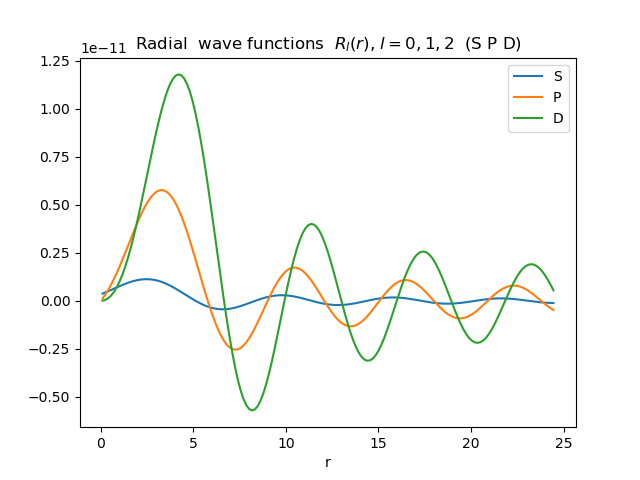

In [1]:
"" "From COMPUTATIONAL PHYSICS" & "COMPUTER PROBLEMS in PHYSICS",
    "    by RH Landau, MJ Paez, and CC Bordeianu (deceased).
    "    Copyright R Landau, Oregon State Unv, MJ Paez, Univ Antioquia,
    "    C Bordeianu, Univ Bucharest, 2020.
    "    Please respect copyright & acknowledge our work. ""
    
# QuantCoulfWFMat.ipynb: Coulomb scattering wavefunctioions using MatPlotLib. 
#                        See QuantumCoulScatt.ipynb for details

% matplotlib notebook

from scipy import special
from mpmath import * #  for complex hypergeometric function 1F1
import matplotlib.pyplot as plt
import numpy as np
from math import *

f1 = np.zeros((10),complex)
Rea = np.zeros((10,161),float)
elab = 7.07   # pojectile (alpha) Lab energy
tmas =  196.966569     # gold mass  u
pmas =  4.002602       # alpha mass in u
ecm = elab*tmas/(pmas+tmas)  # COM energy
redmas = pmas*tmas*931.494/(pmas+tmas) # reduced mass in MeV
hbarc = 197.33                         # in MeV-fm
ka = sqrt(2.0*redmas*ecm)/hbarc        # wave number
zeb = 79                               # atomic number gold
zep = 2                                # atomic number aplpha  
etaco = zep*zeb*redmas/(hbarc*ka*137.) # eta
ii = complex(0,1.0)                    # sqrt(-1)
veloc = sqrt(ecm*2/redmas)             # velocity with c = 1
expi = exp(-0.5*etaco*pi)              # from formula
i = 0  
etaco = 1
print(etaco)                              # counter for radial R

for r in np.arange(0.1,24.5,24.4/161):    # find wavefunction for r values
    rho = complex(0,-2*ka*r)           # -2ikr
    expo = complex(cos(ka*r),sin(ka*r)) # exp(ikr)     
    for el in range(0,10):            # partial waves
        a = el+1.0+etaco*ii             # argument gamma function  
        sol = hyp1f1(a,2*el+2.,rho)     # regular hypergem function
        rhoel = (rho)**el               # rho^l
        factor = rhoel*expo
        gam = special.gamma(a)          # gamma function at l+1+in
        tor = factorial(2*el)           # (2l)!
        twoik = complex(0,2*ka)
        upar = factor*sol*gam*expi*twoik**el/tor
        f1[el] = upar/sqrt(veloc)
        Rea[el,i] = f1.real[el]          # real part wavefunction
    i+= 1
    
rr = np.arange(0.1,24.5,24.5/161)
plt.plot(rr,Rea[0,:],label = 'S') 
plt.plot(rr,Rea[1,:],label = 'P') 
plt.plot(rr,Rea[2,:],label = 'D') 
plt.legend()
plt.xlabel("r")
plt.title ("Radial  wave functions  $R_l(r)$, $l = 0,1,2$  (S P D)")
plt.show()       